# Принятие решений в бизнесе на основе данных

## Описание проекта
### Описание данных

**Данные для первой части**

*Файл /datasets/hypothesis.csv.*
* 		Hypothesis — краткое описание гипотезы;
* 		Reach — охват пользователей по 10-балльной шкале;
* 		Impact — влияние на пользователей по 10-балльной шкале;
* 		Confidence — уверенность в гипотезе по 10-балльной шкале;
* 		Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

*Файл /datasets/orders.csv.*
* 		transactionId — идентификатор заказа;
* 		visitorId — идентификатор пользователя, совершившего заказ;
* 		date — дата, когда был совершён заказ;
* 		revenue — выручка заказа;
* 		group — группа A/B-теста, в которую попал заказ.

*Файл /datasets/visitors.csv.*
* 		date — дата;
* 		group — группа A/B-теста;
* 		visitors — количество пользователей в указанную дату в указанной группе A/B-теста

#### Контекст
***Мы — аналитики крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.***

#### Часть 1. Приоритизация гипотез.
В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача:**
* 		Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* 		Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* 		Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

####  Часть 2. Анализ A/B-теста

*Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.*

**Проанализируйте A/B-тест:**
* Постройте график кумулятивной выручки по группам.
* Постройте график кумулятивного среднего чека по группам.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.
* Постройте график кумулятивной конверсии по группам.
* Постройте график относительного изменения кумулятивной конверсии группы B к группе A.
* Постройте точечный график количества заказов по пользователям.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Сделайте выводы и предположения.

**Примите решение по результатам теста и объясните его:**
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.


<a name="1common."></a>
## <a name="0.0"></a>Содержание:
* [Подгрузка библиотек и самописные функции](#0.)
* [Загрузка данных](#01.)
* [Приоритизация гипотез](#1.)
* [Анализ A/B-теста](#2.)
* [Решение по результатам теста](#3.)

## Подгрузка библиотек и самописные функции
<a name="0."></a>
[<font size="2">(к содержанию)</font>](#1common.)

In [ ]:
# обновим до последней версии чтобы питон не ругался на графики
!pip install seaborn --upgrade

In [2]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

import scipy.stats as stats
import datetime as dt

In [3]:
sns.set_theme(style="white", context="talk")

In [4]:
pd.options.display.max_colwidth = 120

In [5]:
#Определяем болд
def bold(): 
    return "\033[1m"

def bold_end(): 
    return "\033[0m"

#Ставим формат для нумериков
pd.options.display.float_format = '{: >10.2f}'.format

In [6]:
#**Функция print_basic_info, для вывода информации о массиве, и его переменных.**

#* base - название базы данных
#* info - 1: вывод информации о массиве, другое: не вывод
#* describe - 1: вывод описания переменных массива, другое: не вывод        
#* duplicat - 1: вывод количества полных дублей
#* head - n: вывод примера базы (вывод n - строк), n < 1: не вывод

def print_basic_info(base, info, describe, duplicat, head_tail):
    if info == 1:
        print("\n", bold(), colored('info','green'), bold_end(), "\n")
        print( base.info())  
    if head_tail >= 1:
        print("\n", bold(),colored('head_tail','green'),bold_end())
        display(base.head(head_tail).append(base.tail(head_tail)))
    if describe == 1:
        print("\n", bold(),colored('describe','green'),bold_end(),"\n")
        for i in base.columns:
            print("\n", bold(), colored(i,'blue'),bold_end(),"\n", base[i].describe())
    if duplicat == 1:
        print("\n", bold(),colored('duplicated','green'),bold_end(),"\n")
        print(base[base.duplicated() == True][base.columns[0]].count())

## Загрузка данных
<a name="01."></a>
[<font size="2">(к содержанию)</font>](#1common.)

In [7]:
#загрузим
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',',decimal='.')
    orders = pd.read_csv('/datasets/orders.csv', sep=',',decimal='.')
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',',decimal='.')
except:
    hypothesis = pd.read_csv('datasets/hypothesis.csv', sep=',',decimal='.')
    orders = pd.read_csv('datasets/orders.csv', sep=',',decimal='.')
    visitors = pd.read_csv('datasets/visitors.csv', sep=',',decimal='.')


In [8]:
#данные о гипотезах;
print_basic_info(hypothesis,1,0,0,4)


  info  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

  head_tail 


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


* Всего 9 гипотез
* Пропусков в заполнении и дублей нет.

In [9]:
#данные о заказах;
print_basic_info(orders,1,1,1,4)

#уникальных ключей
print("\n", bold(),colored('unique transactionId','green'),bold_end(),"\n")
print(len(orders['transactionId'].unique()))

#уникальных ключей
print("\n", bold(),colored('unique visitorId','green'),bold_end(),"\n")
print(len(orders['visitorId'].unique()))


  info  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

  head_tail 


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B



  describe  


  transactionId  
 count         1197.00
mean    2155621385.53
std     1229084904.76
min        1062393.00
25%     1166775572.00
50%     2145193898.00
75%     3237740112.00
max     4293855558.00
Name: transactionId, dtype: float64

  visitorId  
 count         1197.00
mean    2165960143.10
std     1236014192.15
min        5114589.00
25%     1111826046.00
50%     2217984702.00
75%     3177606451.00
max     4283872382.00
Name: visitorId, dtype: float64

  date  
 count           1197
unique            31
top       2019-08-05
freq              48
Name: date, dtype: object

  revenue  
 count      1197.00
mean       8348.01
std       39191.13
min          50.00
25%        1220.00
50%        2978.00
75%        8290.00
max     1294500.00
Name: revenue, dtype: float64

  group  
 count     1197
unique       2
top          B
freq       640
Name: group, dtype: object

  duplicated  

0

  unique transactionId  

1197

  unique visitorId  

1031


* Всего 1197 транзакций от 1031 пользователя. Значит было несколько транзакций.
* Всего 2 группы в тесте.

In [10]:
#данные о посетителях;
print_basic_info(visitors,1,1,1,4)

#уникальных ключей
print("\n", bold(),colored('unique date','green'),bold_end(),"\n")
print(len(visitors['date'].unique()))


  info  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

  head_tail 


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718



  describe  


  date  
 count             62
unique            31
top       2019-08-05
freq               2
Name: date, dtype: object

  group  
 count     62
unique     2
top        B
freq      31
Name: group, dtype: object

  visitors  
 count        62.00
mean        607.29
std         114.40
min         361.00
25%         534.00
50%         624.50
75%         710.50
max         770.00
Name: visitors, dtype: float64

  duplicated  

0

  unique date  

31


* Всего 62 строки. 31 день для каждой группы

In [11]:
# сразу приведем даты в нужный формат
orders['date'] = orders['date'].astype('datetime64') 
visitors['date'] = visitors['date'].astype('datetime64')

#### Проверка данных orders на адекватность

In [12]:
#Найдем общие айди в кейсах
def in_both(first, second):
    return [item for item in first if item in second]

list_bad_visitorid  = in_both(orders.query("group == 'A'")['visitorId'].unique()
                              , orders.query("group == 'B'")['visitorId'].unique())
len(list_bad_visitorid)

58

In [13]:
# Удалим их

print(len(orders))

orders  = orders[np.logical_not(orders['visitorId'].isin(list_bad_visitorid))]

print(len(orders))

1197
1016


In [14]:
#Проверим
list_bad_visitorid  = in_both(orders.query("group == 'A'")['visitorId'].unique()
                              , orders.query("group == 'B'")['visitorId'].unique())
len(list_bad_visitorid)

0

## Приоритизация гипотез
<a name="1."></a>
[<font size="2">(к содержанию)</font>](#1common.)

9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

#### Фреймворк ICE для приоритизации гипотез.

In [15]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] ) / hypothesis['Efforts']
 
hypothesis['Rank_ICE'] = hypothesis['ICE'].rank(method='first', ascending=False)
hypothesis = hypothesis.sort_values(by='ICE', ascending=False)
hypothesis[['Hypothesis', 'ICE','Rank_ICE']]

,Hypothesis,ICE,Rank_ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,1.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,2.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,3.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,4.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,5.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,6.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,7.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,8.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,9.00


In [16]:
# прочтем гипотезы полностью
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)['Hypothesis'].values[0:5]

array(['Запустить акцию, дающую скидку на товар в день рождения',
       'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'],
      dtype=object)

#### Фреймворк RICE для приоритизации гипотез.

In [17]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
    
hypothesis['Rank_RICE'] = hypothesis['RICE'].rank(method='first', ascending=False)
hypothesis = hypothesis.sort_values(by='RICE', ascending=False)
hypothesis[['Hypothesis', 'RICE','Rank_RICE']]


,Hypothesis,RICE,Rank_RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00,1.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00,2.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00,3.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00,4.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,5.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00,6.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00,7.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00,8.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00,9.00


In [18]:
# прочтем гипотезы полностью
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)['Hypothesis'].values[0:5]


array(['Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

#### Как изменилась приоритизация гипотез при применении RICE вместо ICE.

In [19]:
hypothesis[['Hypothesis', 'Reach', 'Rank_ICE','Rank_RICE']]

,Hypothesis,Reach,Rank_ICE,Rank_RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,3.00,1.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,5.00,2.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,2.00,3.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,4.00,4.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,1.00,5.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,8.00,6.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,6.00,7.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,7.00,8.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,9.00,9.00


Разница в приоритезации гипотез связана с показателем Reach. А именно какой процент аудитории задействуется в рамках этих изменений.

Поэтому вполне логично, что акция связанная с днем рождения ( т.е. взаимодействие с одним клиентом раз в год) снизила свое положение ,
а сбор базы клиентов для email-рассылок ( т.е. новый канал бесконечного взаимодействия) значительно повысила свое.

## Анализ A/B-теста
<a name="2."></a>
[<font size="2">(к содержанию)</font>](#1common.)

Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.

#### График кумулятивной выручки по группам.

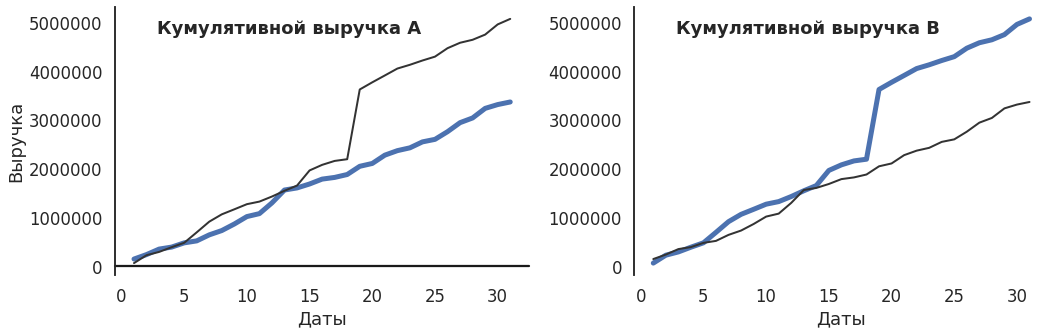

In [20]:
output = orders.pivot_table(
    index='date', columns='group', values='revenue', aggfunc='sum'
)
output.index = (output.index.astype('str').str[-2:]).astype('int')

f, (ax1, ax2)= plt.subplots(1, 2, figsize=(15, 5), sharex=True)
#A
ax1.text(.1, .90, "Кумулятивной выручка A", transform=ax1.transAxes, fontweight="bold")
sns.lineplot(data=output.cumsum(axis = 0), x=output.cumsum(axis = 0).index, y="A", 
             estimator=None,palette="crest", linewidth=5, ax=ax1)
sns.lineplot(data=output.cumsum(axis = 0), x=output.cumsum(axis = 0).index, y="B", 
             estimator=None, color=".2", linewidth=2, ax=ax1)

#B
ax2.text(.1, .90, "Кумулятивной выручка B", transform=ax2.transAxes, fontweight="bold")
sns.lineplot(data=output.cumsum(axis = 0), x=output.cumsum(axis = 0).index, y="B", 
             estimator=None,palette="crest", linewidth=5, ax=ax2)
sns.lineplot(data=output.cumsum(axis = 0), x=output.cumsum(axis = 0).index, y="A", 
             estimator=None, color=".2", linewidth=2, ax=ax2)

ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Выручка")
ax2.set_ylabel("")
ax1.set_xlabel("Даты")
ax2.set_xlabel("Даты")



sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

Комулятивная выручка в тестовой группе Б выше, однако наблюдается резкий скачек в данных, вероятно очень большой заказ.

Это вероятно могло исказить картину.

#### График кумулятивного среднего чека по группам. Сделайте выводы и предположения.

In [21]:
datesGroups = orders[['date', 'group']].drop_duplicates()

output = datesGroups.apply(
    lambda x: orders[
        np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg({'date': 'max','group': 'max','revenue': 'mean'}),
    axis=1
).sort_values(by=['date', 'group'])

output['day'] = output['date'].dt.day

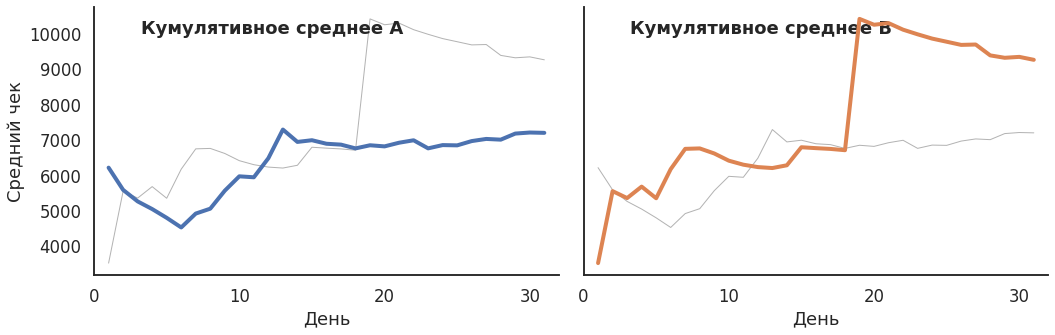

In [22]:


g = sns.relplot(
    data=output,
    y="revenue", x="day", col="group", hue="group",
    kind="line", linewidth=4, zorder=5,
    col_wrap=2, height=5, aspect=1.5, legend=False,
)

for group, ax in g.axes_dict.items():
    ax.text(.1, .90, "Кумулятивное среднее "+str(group), transform=ax.transAxes, fontweight="bold")
    sns.lineplot(
        data=output, x="day", y="revenue", units="group",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

ax.set(xlim=(0, 32))

    
ax.set_xticks(ax.get_xticks()[::2])
g.set_titles("")
g.set_axis_labels("День", "Средний чек")
g.tight_layout()

Как и подозревали были большие чеки которые исказили картину.

#### График относительного изменения кумулятивного среднего чека группы B к группе A.

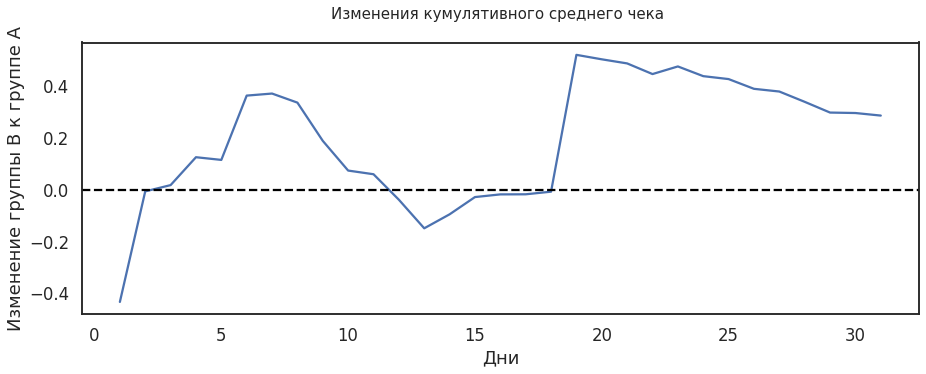

In [23]:
output2 = output.pivot_table(
    index='date', columns='group', values='revenue', aggfunc='mean').reset_index()
output2['change'] = ((output2['B']) / (output2['A']) - 1)

plt.figure(figsize = (15,5)) 

plt.ylim=(-0.5, 0.5)

plt.plot(output2['date'].dt.day,output2['change'] )
plt.axhline(y=0, color='black', linestyle='--') 

plt.title("Изменения кумулятивного среднего чека \n", fontsize=15)
plt.ylabel("Изменение группы B к группе A")
plt.xlabel("Дни")

plt.show()

После взлета среднего в группе Б показатель снижется. Возможно не так хорошо в ней дела.

#### График кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [24]:
datesGroups = orders[['date', 'group']].drop_duplicates()

# найдем уникальные покупки 
output = datesGroups.apply(
    lambda x: orders[
        np.logical_and(orders['date'] == x['date'], orders['group'] == x['group'])
    ].agg({'date': 'max','group': 'max','revenue': 'nunique'}),
    axis=1
).sort_values(by=['date', 'group'])

In [25]:
# соедиминим
conversion_data = output.merge(visitors,  on = ['date', 'group'])

# сделаем коммулятивными
output3 = conversion_data.pivot_table(
    index='date', columns='group', values=['revenue','visitors'], aggfunc='mean')
output3 = output3.cumsum(axis = 0).reset_index()
output3['day'] = output3['date'].dt.day
# расчитаем конверсии
output3['cum_conversion_A'] = output3[( 'revenue', 'A')] / output3[('visitors', 'A')]
output3['cum_conversion_B'] = output3[( 'revenue', 'B')] / output3[('visitors', 'B')]

output3.head()

date revenue     visitors       day cum_conversion_A  \
group                  A   B        A     B                        
0     2019-08-01      22  16      719   713   1             0.03   
1     2019-08-02      40  38     1338  1294   2             0.03   
2     2019-08-03      64  51     1845  1803   3             0.03   
3     2019-08-04      75  65     2562  2573   4             0.03   
4     2019-08-05      97  85     3318  3280   5             0.03   

      cum_conversion_B  
group                   
0                 0.02  
1                 0.03  
2                 0.03  
3                 0.03  
4                 0.03

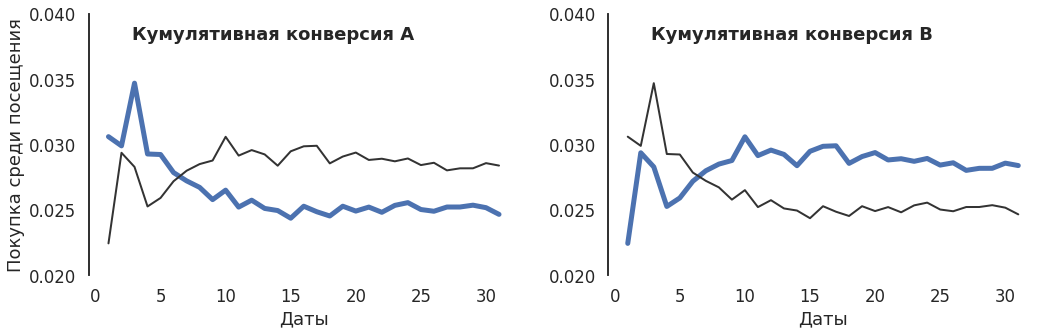

In [26]:
f, (ax1, ax2)= plt.subplots(1, 2, figsize=(15, 5), sharex=True)

ax1.set(ylim=(0.02, 0.04))
ax2.set(ylim=(0.02, 0.04))

#A
ax1.text(.1, .90, "Кумулятивная конверсия A", transform=ax1.transAxes, fontweight="bold")
sns.lineplot(data=output3, x=output3['day'], y="cum_conversion_A", 
             estimator=None,palette="crest", linewidth=5, ax=ax1)
sns.lineplot(data=output3, x=output3['day'], y="cum_conversion_B", 
             estimator=None, color=".2", linewidth=2, ax=ax1)

#B
ax2.text(.1, .90, "Кумулятивная конверсия B", transform=ax2.transAxes, fontweight="bold")
sns.lineplot(data=output3, x=output3['day'], y="cum_conversion_B", 
             estimator=None,palette="crest", linewidth=5, ax=ax2)
sns.lineplot(data=output3, x=output3['day'], y="cum_conversion_A", 
             estimator=None, color=".2", linewidth=2, ax=ax2)

ax1.set_ylabel("Покупка среди посещения")
ax2.set_ylabel("")
ax1.set_xlabel("Даты")
ax2.set_xlabel("Даты")


sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

plt.show()

По данному параметру группа Б опережает А. При этом не виден сильный выброс в данных

#### График относительного изменения кумулятивной конверсии группы B к группе A.

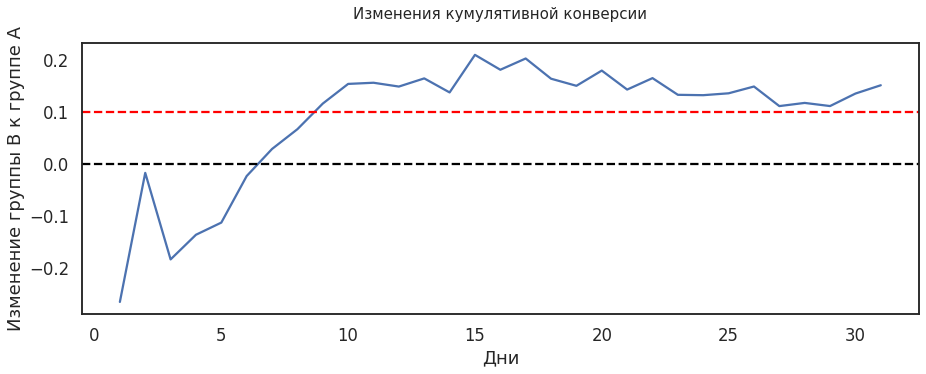

In [42]:
output3['change'] = (output3['cum_conversion_B'] / output3['cum_conversion_A']) - 1

plt.figure(figsize = (15,5)) 
plt.plot(output3['date'].dt.day,output3['change'] )
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='red', linestyle='--') 

plt.title("Изменения кумулятивной конверсии\n", fontsize=15)
plt.ylabel("Изменение группы B к группе A")
plt.xlabel("Дни")
plt.show()

Видна положительная динамика для группы Б. Необходимо проверить нет ли перекоса среди пользователей. Возможно один посетитель совершал аномально много заказов и это сбило динамику

#### Точечный график количества заказов по пользователям. Сделайте выводы и предположения.

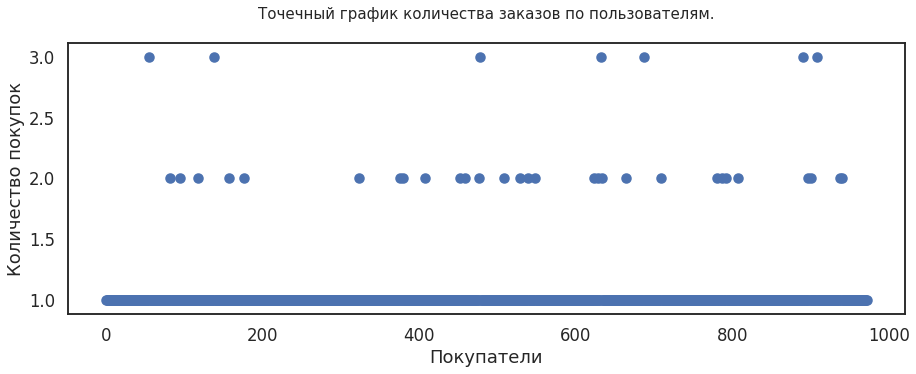

In [28]:
orders_count = orders.pivot_table(index='visitorId', aggfunc='nunique')
x_values = pd.Series(range(0,len(orders_count)))
plt.figure(figsize = (15,5)) 

plt.scatter(x_values, orders_count['transactionId']) 

plt.title("Точечный график количества заказов по пользователям.\n", fontsize=15)
plt.ylabel("Количество покупок")
plt.xlabel("Покупатели")
plt.show()

Большенство покупает немного. Нет резких выбросов. Я бы оставила всех

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [29]:
print("Среднее количества заказов на пользователя:",
    round(orders_count['transactionId'].mean(),2))

Среднее количества заказов на пользователя: 1.04


In [30]:
print("95, 99 персентили количества заказов на пользователя:",
    np.percentile(orders_count['transactionId'], [95, 99])) 

95, 99 персентили количества заказов на пользователя: [1. 2.]


In [31]:
# посмотрим сколько таких людей
print("В 99 персинтиль входит : ", len(orders_count[orders_count['transactionId'] > 2])/len(orders_count) * 100, "процентов")
print("В 95 персинтиль входит : ", len(orders_count[orders_count['transactionId'] > 1])/len(orders_count)* 100, 'процентов')

В 99 персинтиль входит :  0.7194244604316548 процентов
В 95 персинтиль входит :  3.6998972250770814 процентов


Аномальных пользователей не найдено

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

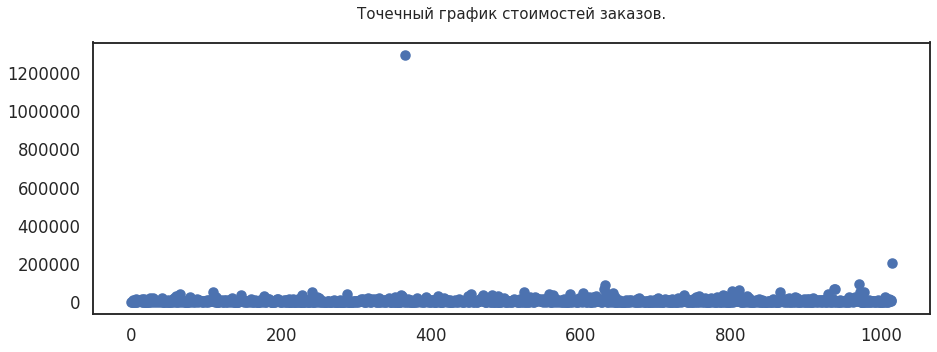

In [32]:
x_values = pd.Series(range(0,len(orders)))
plt.figure(figsize = (15,5)) 

plt.scatter(x_values, orders['revenue']) 

plt.title("Точечный график стоимостей заказов.\n", fontsize=15)
plt.ylabel("")
plt.xlabel("")
plt.show()

Есть один, но запредельно дорогой заказ. Также есть заказы поменьше

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [33]:
print("95, 99 персентили стоимости заказов:",
    np.percentile(orders['revenue'], [95, 99])) 

95, 99 персентили стоимости заказов: [26785. 53904.]


In [34]:
# посмотрим сколько таких людей
print("В 99 персинтиль входит : ", len(orders[orders['revenue'] >= 53904])/len(orders) * 100, "процентов")
print("В 95 персинтиль входит : ", len(orders[orders['revenue'] >= 26785])/len(orders)* 100, 'процентов')

В 99 персинтиль входит :  1.1811023622047243 процентов
В 95 персинтиль входит :  5.019685039370079 процентов


Аномальными будем считать пользователей c суммой заказа 26785 и более.
Это 95-й перцентили количества заказов на пользователя

#### Статистическая значимость различий в конверсии между группами по «сырым» данным.

Будем использовать Манна-Уитни.

    Нулевая гипотеза H0={уровень признака во второй выборке не ниже уровня признака в первой выборке}; 
    Альтернативная гипотеза – H1={уровень признака во второй выборке ниже уровня признака в первой выборке}.
    При этом первой выборкой принято считать ту, где значение признака больше.

Следовательно Нулевая гипотеза:
*  Уровень признака в группе A не ниже уровня признака в группе Б.<br>

In [35]:
conversion_data.columns = ['date','group', 'buyers','visitors']
conversion_data['not_buy'] = conversion_data['visitors'] - conversion_data['buyers']
conversion_data['conversion'] = conversion_data['buyers'] / conversion_data['visitors'] 

In [36]:
alpha = 0.05
pvalue = stats.mannwhitneyu(conversion_data[conversion_data['group']=='A']['not_buy'], conversion_data[conversion_data['group']=='B']['not_buy'])[1]

print("p-value:",'{0:.3f}'.format(pvalue))
print("Различие конверсий:",'{0:.1f}%'.format(100 * (conversion_data[conversion_data['group']=='B']['conversion'].mean()/conversion_data[conversion_data['group']=='A']['conversion'].mean()-1)))

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу, значит уровень признака конверсии в выборке A ниже уровня признака в выборке B")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-value: 0.397
Различие конверсий: 16.5%
Не получилось отвергнуть нулевую гипотезу


####  Статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [37]:
alpha = 0.05
pvalue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print("p-value:",'{0:.3f}'.format(pvalue))
print("Различие средних чеков:",'{0:.1f}%'.format(100 * (orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)))

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу, значит уровень признака revenue в выборке A ниже уровня признака в выборке B")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-value: 0.415
Различие средних чеков: 28.7%
Не получилось отвергнуть нулевую гипотезу


#### Статистическая значимость различий в конверсии между группами по «очищенным» данным.

In [38]:
# почистим наши данные
orders_cl = orders[orders['revenue'] < 26785]
#orders_cl  = orders_cl[orders_cl['visitorId'].isin(orders_count[orders_count['transactionId'] <= 2].index)]

print("len(orders):",len(orders),"len(orders_cl):",len(orders_cl))

len(orders): 1016 len(orders_cl): 965


In [39]:
# пересчитаем данные
output = datesGroups.apply(
    lambda x: orders_cl[
        np.logical_and(orders_cl['date'] == x['date'], orders_cl['group'] == x['group'])
    ].agg({'date': 'max','group': 'max','revenue': 'nunique'}),
    axis=1
).sort_values(by=['date', 'group'])

conversion_data = output.merge(visitors,  on = ['date', 'group'])

conversion_data.columns = ['date','group', 'buyers','visitors']
conversion_data['not_buy'] = conversion_data['visitors'] - conversion_data['buyers']
conversion_data['conversion'] = conversion_data['buyers'] / conversion_data['visitors'] 

In [40]:
alpha = 0.05
pvalue = stats.mannwhitneyu(conversion_data[conversion_data['group']=='A']['not_buy'], conversion_data[conversion_data['group']=='B']['not_buy'])[1]

print("p-value:",'{0:.3f}'.format(pvalue))
print("Конверсия:",'{0:.1f}%'.format(100 * conversion_data['conversion'].mean()))
print("Различие конверсий:",'{0:.1f}%'.format(100 * (conversion_data[conversion_data['group']=='B']['conversion'].mean()/conversion_data[conversion_data['group']=='A']['conversion'].mean()-1)))

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу, значит уровень признака конверсии в выборке A ниже уровня признака в выборке B")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-value: 0.397
Конверсия: 2.6%
Различие конверсий: 15.9%
Не получилось отвергнуть нулевую гипотезу


#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [41]:
alpha = 0.05
pvalue = stats.mannwhitneyu(orders_cl[orders_cl['group']=='A']['revenue'], orders_cl[orders_cl['group']=='B']['revenue'])[1]

print("p-value:",'{0:.3f}'.format(pvalue))
print("Средние чек:", round(orders_cl['revenue'].mean()))
print("Различие средних чеков:",'{0:.1f}%'.format(100 * ((orders_cl[orders_cl['group']=='B']['revenue'].mean()/orders_cl[orders_cl['group']=='A']['revenue'].mean())-1)))

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу, значит уровень признака revenue в выборке A ниже уровня признака в выборке B")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-value: 0.349
Средние чек: 5035
Различие средних чеков: -5.9%
Не получилось отвергнуть нулевую гипотезу


### Выводы

В среднем пользователь за месяц совершает один заказ 1 на сумму около 5 тыс.
Конверсия из посетителей в покупки составляет 2.6%.

Представители группы B имеют отличную от А конверсию в покупку. А именно на 16.5% больше.

Однако, мы не можем считать данное отличие статистически значимым.

Различие в средних чеках между группами не велико (около 5%).

## Решение по результатам теста
<a name="3."></a>
[<font size="2">(к содержанию)</font>](#1common.)

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.


***Я считаю, что необходимо остановить тест, зафиксировать отсутствие различий между группами.***

Мы не просто так изначально обозначили данные 30 дней для теста. Это время расчетно должно было быть достаточно, для "прокраса".

Вероятно наша гипотеза недостаточно мощная или есть другие важные факторы которые мы не учитываем.

Поэтому самый разумный вариант пересмотреть гипотезу и попробовать ее улучшить аналитическим путем.
Возможно провести фокус группы для понимания инсайтов. Например: Увеличить размер скидки или расширить ЦА.